In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN ,KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


In [6]:
data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\Data Sphere\\Datasets\\wine-clustering.csv")


In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

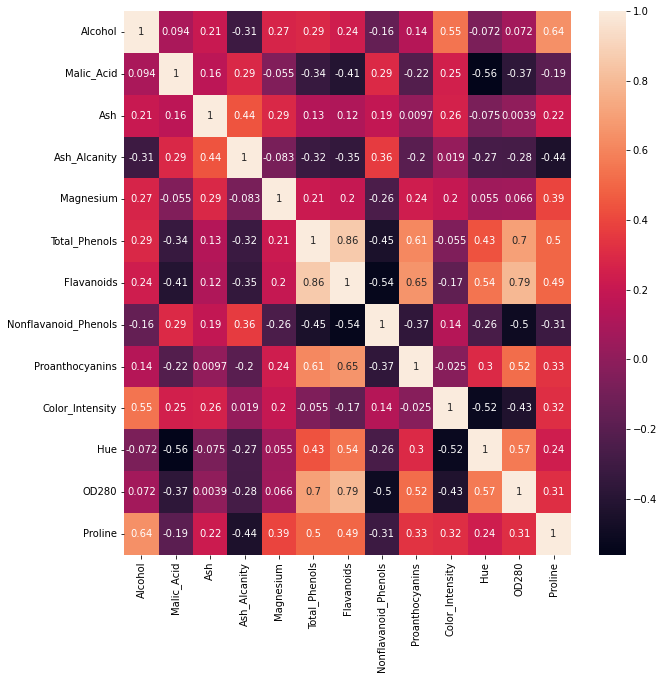

In [10]:
plt.figure(figsize =(10 ,10))
sns.heatmap(data.corr() ,annot=True)
plt.show()

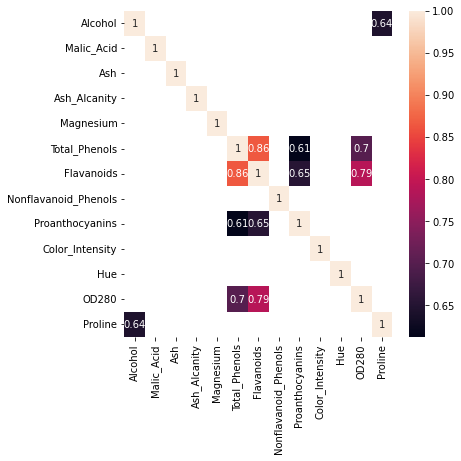

In [11]:
corr =data.corr().abs()
high_corr =corr[(corr)>0.6]
plt.figure(figsize =(6,6))
sns.heatmap(high_corr ,annot=True)
plt.show()

In [12]:
scaler =StandardScaler()
X_standardized =scaler.fit_transform(data)
x_train ,test =train_test_split(X_standardized ,test_size =0.4 ,random_state =42)
x_val ,x_test =train_test_split(test ,test_size =0.5 ,random_state =42)

In [13]:
x_train =pd.DataFrame(x_train)
x_train.columns =data.columns
x_train

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.656018,-0.409647,-1.632171,-1.049479,-0.192495,-1.097777,-0.461091,-0.176095,-0.772492,-0.544212,1.195772,-0.666229,-1.015514
1,1.358028,-0.158301,-0.243142,-0.448909,0.369212,1.049347,1.295850,-1.143031,1.382572,0.299300,1.283518,0.788587,2.430109
2,-0.161348,2.040973,0.414820,0.602088,-0.964842,-0.953567,-1.384741,0.871420,-1.280596,1.121183,-1.831492,-1.061713,-0.388168
3,0.061000,3.109192,-0.864550,0.602088,-0.964842,0.520578,0.623193,-0.498407,0.734300,-1.063296,-0.997898,0.689716,-1.168369
4,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1.061565,-0.741782,1.109334,1.653086,-0.964842,1.049347,0.834026,-1.223610,0.489009,-0.725891,1.766126,0.774463,-1.072834
102,-0.927212,-0.544297,-0.901103,-0.148624,-1.386122,-1.033684,0.000733,0.065639,0.068508,-0.717240,0.186684,0.788587,-0.754385
103,1.703902,-0.418624,0.049285,-2.250619,0.158572,1.610163,1.617120,-0.578985,2.398780,1.056297,1.064151,0.548472,2.547935
104,-0.383696,-0.723829,-0.389355,0.361860,-1.386122,-1.466313,-0.571528,1.757779,0.050988,-0.868639,0.011190,-0.779224,-0.802153


In [14]:
test =pd.DataFrame(test)

In [15]:
test.columns =x_train.columns
test

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.312420
1,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,1.060776
2,-0.087232,0.425180,1.218995,0.451946,-0.262708,-1.209940,-1.535336,1.354888,-1.473326,-0.198156,-0.822404,-0.426113,-0.467781
3,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
4,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.927212,1.385679,-0.608676,-0.298767,0.860705,-1.466313,-1.254225,-0.578985,-0.790013,1.363422,-1.348885,-0.863971,0.344265
68,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
69,0.839217,-0.454530,-0.023821,-0.689137,0.298998,0.200111,0.663351,0.468530,0.664217,-0.526909,1.195772,0.364855,0.774172
70,-0.655454,-0.732806,-0.608676,-0.148624,4.371372,0.328298,0.241685,-0.337251,2.959447,-1.063296,0.888658,0.025868,0.605394


In [16]:
x_val =pd.DataFrame(x_val)
x_val.columns =x_train.columns
x_val

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675
1,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
2,-1.137207,-1.082894,0.524480,1.352801,-1.526548,-0.472868,-0.451052,0.307374,-0.334471,-1.236324,1.546759,0.152988,-0.372246
3,-0.778980,-1.136754,-0.974210,-0.298767,-0.824415,1.962676,1.727556,-0.981875,0.629175,-0.241413,0.362177,0.223610,-0.276711
4,-1.717782,-0.885409,1.218995,0.151661,-0.403135,0.712858,0.894264,-0.578985,1.575301,-1.041667,0.011190,0.915707,-0.213021
5,0.345111,-0.625086,1.730742,-1.199622,0.720278,0.488531,0.653312,-0.176095,-0.404554,-0.198156,0.581544,0.237735,0.423878
6,-1.236028,0.981731,-1.339744,-0.148624,-0.894628,-0.472868,-0.390814,0.065639,0.489009,-1.634288,-0.120430,0.619094,-0.582422
7,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711
8,0.369816,-0.553273,-0.827996,-0.749194,-0.403135,0.168065,0.161368,-0.740141,-0.422075,-0.479326,0.274431,0.223610,1.713598
9,0.283348,0.865035,-0.316249,-0.298767,-0.122282,-0.793334,-1.204027,1.999513,0.489009,2.362658,-1.743745,-1.556068,-0.228944


In [17]:
x_test =pd.DataFrame(x_test)
x_test.columns =x_train.columns
x_test

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385
1,-0.976623,-1.029035,-2.253579,-0.809251,3.599025,-0.713218,-0.752242,-1.787656,1.592822,-0.955153,1.415139,0.647343,-0.092010
2,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319
3,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.312420
4,-1.137207,-0.454530,-0.170035,-0.298767,-1.315908,-1.113800,-0.531369,1.274310,0.086029,-1.149810,0.537671,-0.482611,-0.849920
5,0.036295,-1.289357,-2.399793,-1.049479,-0.964842,-0.552984,0.000733,-0.981875,-0.229346,-0.198156,1.020278,-0.185998,-1.130155
6,0.616869,-0.472483,0.890014,0.151661,-0.262708,0.376368,0.583034,-0.659563,0.121071,-0.665332,0.713164,1.706675,0.312420
7,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055
8,0.505695,1.349773,-0.901103,-0.208681,-0.683988,0.248181,0.653312,-0.740141,-0.194304,-0.336578,-0.208177,0.548472,0.917474
9,0.604516,1.125357,-0.645229,0.001518,-0.824415,-1.081754,-1.555415,1.757779,-1.245555,0.277671,-0.646911,-1.118210,-0.531471


In [19]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(x_train)
train_kmeans_avg =silhouette_score(x_train ,labels_train)

labels_validation =k_means.predict(x_val)
val_kmeans_avg =silhouette_score(x_val ,labels_validation)

labels_test =k_means.predict(x_test)
test_kmeans_avg =silhouette_score(x_test ,labels_test)


Silhoutte Score : 0.2808620526436534


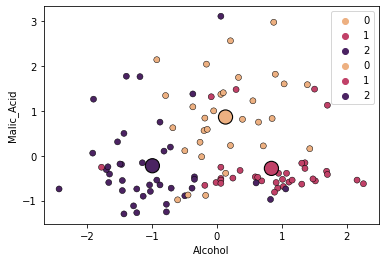

In [20]:
sns.scatterplot(x =x_train.iloc[ : ,0] ,y =x_train.iloc[ : ,1] ,
                data =x_train ,hue =labels_train ,palette='flare' ,edgecolor ='k')

centers_df = pd.DataFrame(k_means.cluster_centers_[: , :2], columns=['x', 'y'])
sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="X")

print("Silhoutte Score :" ,train_kmeans_avg)
plt.show()

[3 3 3 2 1 2 3 3 3 3 2 3 3 3 2 3 3 3 2 1 1 1 3 3 1 1 3 3 1 3 3 2 3 3 3 1 1
 3 3 1 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


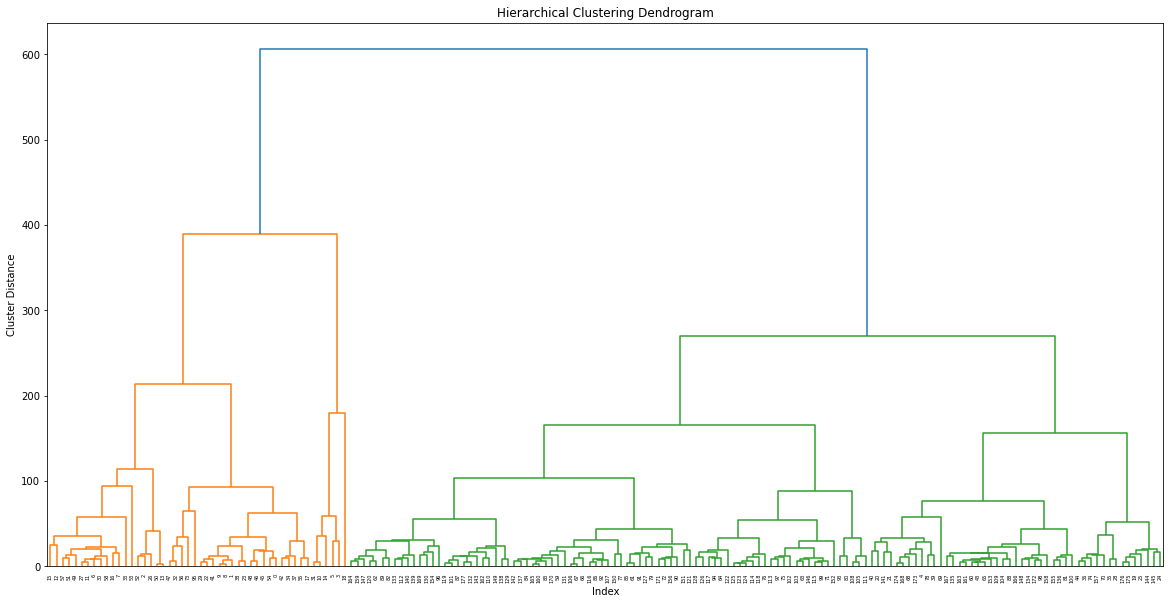

In [21]:
from scipy.cluster.hierarchy import fcluster
k =3
plt.figure(figsize =(20 ,10))
linked =linkage(data ,method="centroid")
dendrogram(linked ,orientation="top" ,distance_sort="descending")
clusters =fcluster(linked ,k ,criterion="maxclust")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Cluster Distance")
print(clusters)
plt.show()

In [23]:
model = AgglomerativeClustering(n_clusters=3)

labels_train_A = model.fit_predict(x_train)
silhouette_avg_train = silhouette_score(x_train, labels_train_A)

labels_validation_A = model.fit_predict(x_val)
silhouette_avg_val = silhouette_score(x_val, labels_validation_A)

labels_test_A = model.fit_predict(x_test)
silhouette_avg_test = silhouette_score(x_test, labels_test_A)



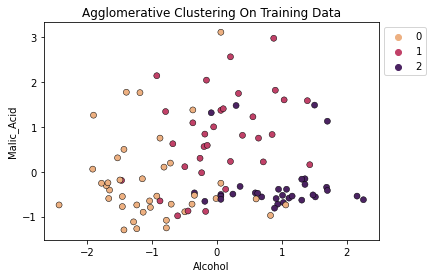

In [24]:
sns.scatterplot(x=x_train.iloc[:,0], y= x_train.iloc[:,1], data= x_train, hue=labels_train_A,palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Training Data')
plt.show()

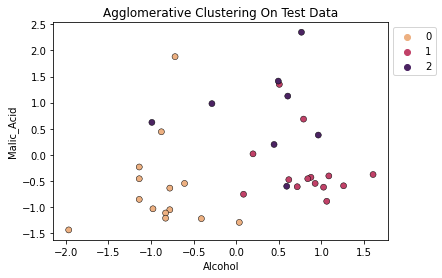

In [25]:
sns.scatterplot(x=x_test.iloc[:,0], y= x_test.iloc[:,1], data= x_test, hue=labels_test_A, palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Test Data')
plt.show()

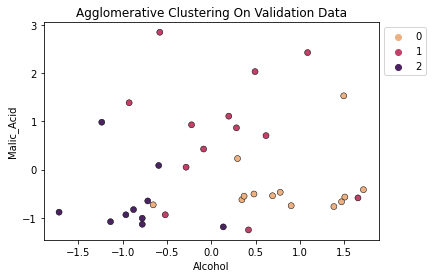

In [26]:
sns.scatterplot(x=x_val.iloc[:,0], y= x_val.iloc[:,1], data= x_val, hue=labels_validation_A,palette= 'flare',edgecolor='k')
plt.title('Agglomerative Clustering On Validation Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

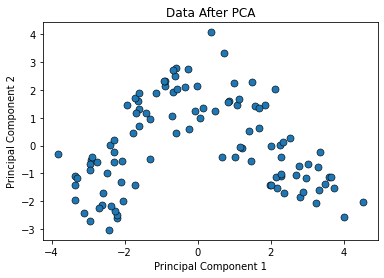

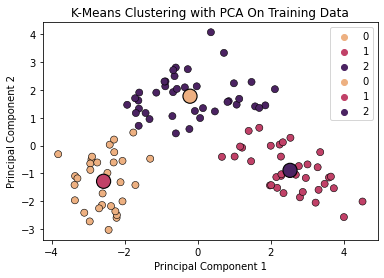

In [27]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.fit_transform(x_val)
x_test_pca = pca.fit_transform(x_test)

# Visualize the data after PCA
df_train_pca = pd.DataFrame(data=x_train_pca
                            , columns=['PC1', 'PC2']
                           )
sns.scatterplot(x='PC1'
                , y='PC2'
                , data=df_train_pca
                , marker='o'
                , s=50
                , edgecolor='k')

plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply K-Means clustering on the PCA-transformed data
k_means = KMeans(n_clusters=3, random_state=42,n_init=10)
labels = k_means.fit_predict(x_train_pca)
labels_val = k_means.predict(x_val_pca)
labels_test = k_means.predict(x_test_pca)

# Silhouette_score for train, val ,test sets
train_pca_avg = silhouette_score(x_train_pca, labels)
val_pca_avg = silhouette_score(x_val_pca, labels_val)
test_pca_avg = silhouette_score(x_test_pca, labels_test)

# Visualize the clustering result

centers_df = pd.DataFrame(k_means.cluster_centers_[: , :2], columns=['x', 'y'])

sns.scatterplot(x='PC1'
                , y='PC2' 
                ,data=df_train_pca
                , hue=labels_train
                , marker='o'
                , s=50
                ,palette='flare'
                ,edgecolor='k')

#plt.scatter(x=centers_df["x"], y=centers_df["y"], marker='o',s=200, c=range(len(centers_df)), label=labels_train ,cmap='viridis')

sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="*")

plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

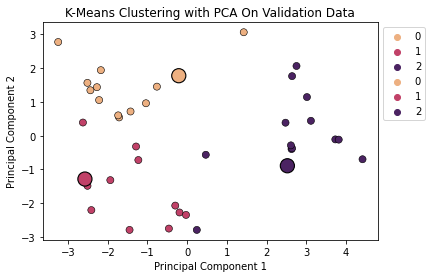

Silhouette Score on Validation Set: 0.4573229114021161


In [28]:
centers_val =pd.DataFrame(k_means.cluster_centers_ ,columns =['x' ,'y'])


sns.scatterplot(x =x_val_pca[: ,0] ,y =x_val_pca[: ,1] , hue=labels_val, marker='o', s=50,palette='flare',edgecolor='k')

sns.scatterplot(x ='x' ,y ='y' ,data =centers_val ,s =200 ,hue =range(len(centers_val)) ,palette='flare'
               ,edgecolor='k' ,markers ='*')


plt.title('K-Means Clustering with PCA On Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print(f'Silhouette Score on Validation Set: {val_pca_avg}')
